In [1]:
import tensorflow as tf
import numpy as np
import cv2
import os
import numpy as np
import pandas as pd
import imageio
import random
import matplotlib.pyplot as plt
import keras
import tensorflow.keras as K
import tensorflow.keras.backend as Kback

from keras import layers
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import AveragePooling2D
from keras.layers import Dropout
from keras.layers import Conv2DTranspose
from keras.layers import concatenate
from keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.callbacks import EarlyStopping
from keras.applications.resnet import ResNet50
from keras.applications import vgg16
from keras.applications import inception_v3
from keras.src.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications import DenseNet121, NASNetMobile, EfficientNetB0, Xception
from keras.layers import GlobalAveragePooling2D
from keras.applications.densenet import DenseNet121

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.utils.class_weight import compute_class_weight


from collections import Counter
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

2024-09-29 23:13:22.577122: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-29 23:13:22.577223: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-29 23:13:22.737714: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')
# with open('/content/drive/My Drive/foo.txt', 'w') as f:
#   f.write('Hello Google Drive!')
# !cat /content/drive/My\ Drive/foo.txt

In [3]:
# dataset="/content/drive/My Drive/LUNGCANCER/IQ-OTH/The IQ-OTHNCCD lung cancer dataset"

In [4]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Define the base path to your dataset
base_path = "/kaggle/input/iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset"

# List of class names (A, B, C)
class_names =  ["Normal cases", "Malignant cases", "Bengin cases"]

# Initialize empty lists for images and labels
all_images = []
all_labels = []

# Load images and assign labels
for label, class_name in enumerate(class_names):
    class_path = os.path.join(base_path, class_name)
    image_files = os.listdir(class_path)

    for image_file in image_files:
        image_path = os.path.join(class_path, image_file)
        img = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Read as GBR
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)


        # img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
        img = cv2.resize(img, (224, 224))  # Resize to desired dimensions
        img = img / 255.0  # Normalize pixel values (assuming 8-bit images)
        all_images.append(img)
        all_labels.append(label)


In [5]:
data=all_images
labels=all_labels

In [6]:
data, labels = shuffle(data, labels, random_state=42)


print('Data length:', len(data))
print('labels counts:', Counter(labels))

X = np.array(data).reshape(-1, 224, 224, 3)
y = np.array(labels)

Data length: 1097
labels counts: Counter({1: 561, 0: 416, 2: 120})


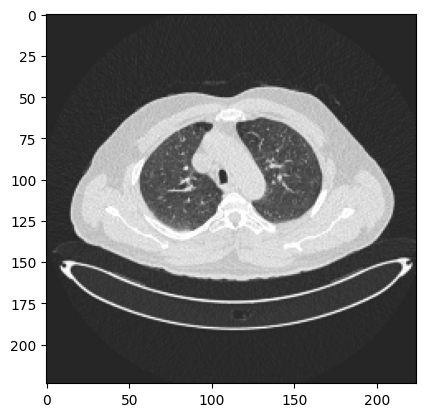

In [7]:
plt.imshow(X[y==2][2])

In [8]:
#run when tuner
import keras_tuner as kt
from keras.applications import VGG16
from keras.models import Sequential
from keras import layers
from keras.optimizers import Adam
# from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical


# Assuming X and y are your input data and labels
X_train, X_mix, y_train, y_mix = train_test_split(X, y, test_size=0.2, random_state=10)
# X_test, X_valid, y_test, y_valid = train_test_split(X_mix, y_mix, test_size=0.2, random_state=10)


X_test=X_mix
y_test=y_mix
X_valid=X_test
y_valid=y_test


# One-hot encode the labels
num_classes = 3  # Adjust this based on your dataset
y_train = to_categorical(y_train, num_classes)
y_valid = to_categorical(y_valid, num_classes)
y_test = to_categorical(y_test, num_classes)

train_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train, y_train, batch_size=8, shuffle=True)
validation_generator = val_datagen.flow(X_valid, y_valid, batch_size=8, shuffle=True)


In [9]:
# # this i for model taainig



# X_train, X_mix, y_train, y_mix = train_test_split(X, y, test_size=0.2, random_state=10)
# # X_test, X_valid, y_test, y_valid = train_test_split(X_mix, y_mix, test_size=0.2, random_state=10)
# X_test=X_mix
# y_test=y_mix
# X_valid=X_test
# y_valid=y_test

# print('Train length:', len(X_train), X_train.shape)
# print('Valid length:', len(X_valid), X_valid.shape)
# print("Test", len(X_test), X_test.shape)
# train_datagen = ImageDataGenerator()
# val_datagen = ImageDataGenerator()
# # X,y valid are used for evaluate matrix






# # X_train, X_valid, y_train, y_valid=X_train, X_test, y_train, y_test


# # print('Train length:', len(X_train), X_train.shape)
# # print('Valid length:', len(X_valid), X_valid.shape)

# # train_generator = train_datagen.flow(X_fold, y_fold, batch_size=8, shuffle=True)
# # validation_generator = val_datagen.flow(X_valid, y_valid, batch_size=8, shuffle=True)

# **Non Attention tweaking**

## method 1

In [ ]:
# base_model = VGG16(
#     weights='imagenet',
#     include_top=False,
#     input_shape=(224,224,3)
# )

# # We define the number of classes in the classification problem.
# NUM_CLASSES = 3

# # First, a sequential model is created, which will be used to build the VGG model.
# vgg_model = Sequential()

# # Se agrega una capa al modelo. base_model el modelo anteriormente preentrenado.
# vgg_model.add(base_model)

# # A flattening layer (Flatten) is added. This layer converts the output from the
# # previous layer (which is likely a three-dimensional tensor) into a one-dimensional vector.
# vgg_model.add(layers.Flatten())


# intermediate_features = vgg_model.layers[-1].output
# attention_weights = layers.Dense(1, activation='softmax')(intermediate_features)
# attention_weights = layers.Reshape((1, 1, -1))(attention_weights)
# attention_output = layers.Multiply()([intermediate_features, attention_weights])


# # vgg_model.add(layers.Dropout(0.25))
# # vgg_model.add(layers.Dense(256, activation='relu'))
# # vgg_model.add(layers.Dense(128, activation='relu'))
# # vgg_model.add(layers.Dense(64, activation='relu'))



# vgg_model.add(layers.Dense(64, activation='relu'))
# vgg_model.add(layers.Dense(128, activation='relu'))




# vgg_model.add(layers.Dense(NUM_CLASSES, activation='softmax'))

# # The first layer of the model (base_model) is frozen, so the weights of this layer
# # will not be updated during training.
# vgg_model.layers[0].trainable = False



# vgg_model.summary()




In [ ]:
# pip install keras-tuner


In [ ]:
# def build_model(hp):
#     base_model = MobileNetV2(
#     weights='imagenet',
#     include_top=False,
#     input_shape=(224,224,3)
# )

#     base_model.trainable = False

#     model = Sequential()
#     model.add(base_model)
#     model.add(layers.Flatten())

#     # Tune the number of units in the Dense layer
#     for i in range(hp.Int('num_layers', 1, 3)):
#         model.add(layers.Dense(
#             units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
#             activation='relu'
#         ))
# #         model.add(layers.Dropout(rate=hp.Float('dropout_' + str(i), min_value=0.2, max_value=0.5, step=0.1)))

#     model.add(layers.Dense(num_classes, activation='softmax'))

#     # Tune the learning rate for the optimizer
#     lr = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')

#     model.compile(
#         optimizer=Adam(learning_rate=lr),
#         loss='categorical_crossentropy',
#         metrics=['accuracy']
#     )

#     return model


In [ ]:
# tuner = kt.Hyperband(
#     build_model,
#     objective='val_accuracy',
#     max_epochs=20,
#     factor=3,
#     directory='my_dir',
#     project_name='hyperparameter_tuning'
# )


In [ ]:
# tuner.search(train_generator, validation_data=validation_generator, epochs=20)


In [ ]:
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# print(f"""
# The optimal number of units in the first dense layer is {best_hps.get('units_0')} with a dropout rate of {best_hps.get('dropout_0')}.
# The optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
# """)


In [ ]:
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# print(f"""
# The optimal number of units in the 1st dense layer is {best_hps.get('units_0')}
# The optimal number of units in the 2nd dense layer is {best_hps.get('units_1')}
# The optimal number of units in the 3rd dense layer is {best_hps.get('units_2')}

# The optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
# """)


In [ ]:
# # Build the model with the optimal hyperparameters
# model = tuner.hypermodel.build(best_hps)

# # Train the model
# history=model.fit(train_generator, validation_data=validation_generator, epochs=20)

# # Evaluate the model on the test data
# test_loss, test_accuracy = model.evaluate(X_test, y_test)
# print(f'Test Loss: {test_loss}')
# print(f'Test Accuracy: {test_accuracy}')


In [ ]:



# optimizer=keras.optimizers.Adam(learning_rate=0.001)
# losses=keras.losses.SparseCategoricalCrossentropy()
# metrics=['accuracy']
# vgg_model.compile(optimizer=optimizer,loss=losses,metrics=metrics)

# epochs=20
# batch_size=32
# history= vgg_model.fit(X_train,y_train, epochs=20, batch_size=32, validation_data=(X_valid, y_valid))




In [ ]:
# test_loss, test_accuracy = vgg_model.evaluate(X_valid,y_valid)
# print('Test Loss:', test_loss)
# print('Test Accuracy:', test_accuracy)
# y_pred = vgg_model.predict(X_valid, verbose=1)
# y_pred_2 = np.argmax(y_pred, axis=1)

# print(classification_report(y_valid, y_pred_2))

In [ ]:
vgg_model=model
# y_pred = vgg_model.predict(X_valid, verbose=1)
# y_pred_2 = np.argmax(y_pred, axis=1)

# print(classification_report(y_valid, y_pred))

In [ ]:
import numpy as np
from sklearn.metrics import classification_report
# Assuming y_valid is one-hot encoded

vgg_model=model
y_valid_labels = np.argmax(y_valid, axis=1)
# Predict the classes
y_pred = vgg_model.predict(X_valid, verbose=1)
y_pred_labels = np.argmax(y_pred, axis=1)

# Print the classification report
print(classification_report(y_valid_labels, y_pred_labels))


In [ ]:
cm= confusion_matrix(y_true=y_valid_labels, y_pred=y_pred_labels)
target_names = ["Benign", "Malignant", "Normal"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show

In [ ]:
import numpy as np
from sklearn.metrics import classification_report
# Assuming y_valid is one-hot encoded
y_valid_labels = np.argmax(y_valid, axis=1)
# Predict the classes
y_pred = vgg_model.predict(X_valid, verbose=1)
y_pred_labels = np.argmax(y_pred, axis=1)

# Print the classification report
print(classification_report(y_valid_labels, y_pred_labels))


In [ ]:
history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label = 'Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label = 'Training Accuracy')

plt.setp(line1)
plt.setp(line2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label = 'Training Loss')

plt.setp(line1)
plt.setp(line2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
#One vs One
roc_auc_score(y_valid, y_pred,multi_class='ovo')

In [ ]:
#One vs Rest
roc_auc_score(y_valid, y_pred,multi_class='ovr')

In [10]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Multiply, BatchNormalization, Dropout, GlobalAveragePooling2D

# Attemntion TweKING

In [12]:
def build_model1(hp):
    base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

    base_model.trainable = False

    model1 = Sequential()
    model1.add(base_model)
    model1.add(layers.Flatten())
    
    
    
    
    dummy_input = tf.zeros((1, 224, 224, 3))
    _ = model1(dummy_input)
    
    
    intermediate_features = model1.layers[-1].output
    attention_weights = layers.Dense(1, activation='softmax')(intermediate_features)
    attention_weights = layers.Reshape((1, 1, -1))(attention_weights)
    attention_output = layers.Multiply()([intermediate_features, attention_weights])
    
    
    for i in range(hp.Int('num_layers', 1, 3)):
        
        model1.add(layers.Dense(
            units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
            activation='relu'
        ))
#         model1.add(layers.Dropout(rate=hp.Float('dropout_' + str(i), min_value=0.2, max_value=0.5, step=0.1)))

    model1.add(layers.Dense(num_classes, activation='softmax'))
    
    
#     NUM_CLASSES = 3
#     inputs = layers.Input(shape=(224, 224, 3))
#     x = base_model(inputs)
#     x= layers.Flatten()(x)
# # intermediate_features = mobilenet_v2_model_2.layers[-1].output
#     attention_weights = layers.Dense(1, activation='softmax')(x)
#     attention_weights = layers.Reshape((1, 1, -1))(attention_weights)
#     attention_output = layers.Multiply()([x, attention_weights])
# #     x = layers.Dense(64, activation='relu')(x)
# #     x = layers.Dense(128, activation='relu')(x)




    # Tune the number of units in the Dense layer
#     for i in range(hp.Int('num_layers', 1, 3)):
#         model1
# #         x=layers.Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
#             activation='relu')(x)
#         model1.add(layers.Dropout(rate=hp.Float('dropout_' + str(i), min_value=0.2, max_value=0.5, step=0.1)))

    # Output layer
#     outputs = Dense(NUM_CLASSES, activation='softmax')(x)

    # Tune the learning rate for the optimizer
    lr = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')
    
#     model1=models.Model(inputs,outputs)

    model1.compile(
        optimizer=Adam(learning_rate=lr),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model1


In [13]:
tuner1 = kt.Hyperband(
    build_model1,
    objective='val_accuracy',
    max_epochs=20,
    factor=3,
    directory='my_dir',
    project_name='hyperparameter_tuning'
)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [14]:
tuner1.search(train_generator, validation_data=validation_generator, epochs=30)


Trial 30 Complete [00h 01m 13s]
val_accuracy: 0.9863636493682861

Best val_accuracy So Far: 0.9954545497894287
Total elapsed time: 00h 18m 18s


In [15]:
best_hps = tuner1.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The optimal number of units in the 1st dense layer is {best_hps.get('units_0')}
The optimal number of units in the 2nd dense layer is {best_hps.get('units_1')}
The optimal number of units in the 3rd dense layer is {best_hps.get('units_2')}
The optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")



The optimal number of units in the 1st dense layer is 384
The optimal number of units in the 2nd dense layer is 64
The optimal number of units in the 3rd dense layer is 32
The optimal learning rate for the optimizer is 0.0007665147061365762.



In [16]:
# Build the model with the optimal hyperparameters
model1 = tuner1.hypermodel.build(best_hps)
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (1, 7, 7, 1280)        │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (1, 62720)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (1, 384)               │    24,084,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (1, 64)                │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (1, 32)                │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (1, 3)                 │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,369,667 (100.59 MB)

 Trainable params: 24,111,683 (91.98 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [17]:

# Train the model
history=model1.fit(train_generator, validation_data=validation_generator, epochs=100)

# Evaluate the model on the test data
test_loss, test_accuracy = model1.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


Epoch 1/100
 10/110 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5901 - loss: 3.0654

W0000 00:00:1727650953.673456     121 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


109/110 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7798 - loss: 1.9401

W0000 00:00:1727650960.661646     121 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


110/110 ━━━━━━━━━━━━━━━━━━━━ 16s 81ms/step - accuracy: 0.7807 - loss: 1.9290 - val_accuracy: 0.9500 - val_loss: 0.2313
Epoch 2/100
  7/110 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9805 - loss: 0.0563

W0000 00:00:1727650962.546989     121 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9492 - loss: 0.4442 - val_accuracy: 0.9636 - val_loss: 0.1189
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9801 - loss: 0.0849 - val_accuracy: 0.9682 - val_loss: 0.1384
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9903 - loss: 0.0457 - val_accuracy: 0.9864 - val_loss: 0.0822
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9938 - loss: 0.0178 - val_accuracy: 0.9909 - val_loss: 0.0964
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9997 - loss: 0.0022 - val_accuracy: 0.9682 - val_loss: 0.1128
Epoch 7/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9968 - loss: 0.0083 - val_accuracy: 0.9818 - val_loss: 0.0814
Epoch 8/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 1.0000 - loss: 1.5761e-04 - val_accuracy: 0.9864 - val_loss: 0.0687
Epoch 9/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 1.0000 - loss: 1.1551e-04 - val_

W0000 00:00:1727651189.260932     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.9965 - loss: 0.0503
Test Loss: 0.06443727016448975
Test Accuracy: 0.9954545497894287


W0000 00:00:1727651195.780991     121 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [18]:
import numpy as np
from sklearn.metrics import classification_report
# Assuming y_valid is one-hot encoded

vgg_model=model1
y_valid_labels = np.argmax(y_valid, axis=1)
# Predict the classes
y_pred = vgg_model.predict(X_valid, verbose=1)
y_pred_labels = np.argmax(y_pred, axis=1)

# Print the classification report
print(classification_report(y_valid_labels, y_pred_labels))


5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

W0000 00:00:1727651199.205756     121 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 534ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        92
           1       1.00      1.00      1.00       110
           2       1.00      0.94      0.97        18

    accuracy                           1.00       220
   macro avg       1.00      0.98      0.99       220
weighted avg       1.00      1.00      1.00       220



W0000 00:00:1727651202.407938     120 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


<function matplotlib.pyplot.show(close=None, block=None)>

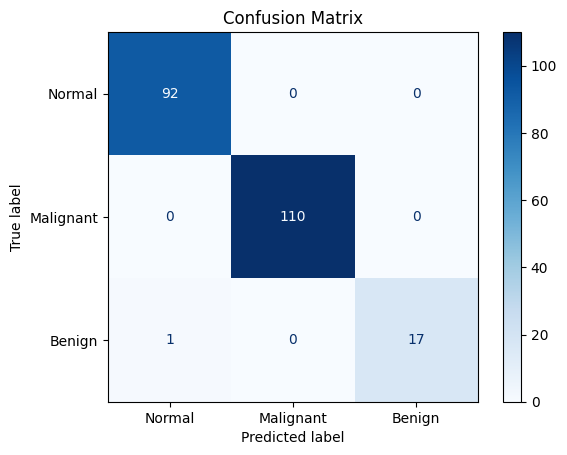

In [19]:
cm= confusion_matrix(y_true=y_valid_labels, y_pred=y_pred_labels)
target_names = ["Normal", "Malignant", "Benign"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gapcolor: color or None
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Path` or `~.markers.MarkerStyle`

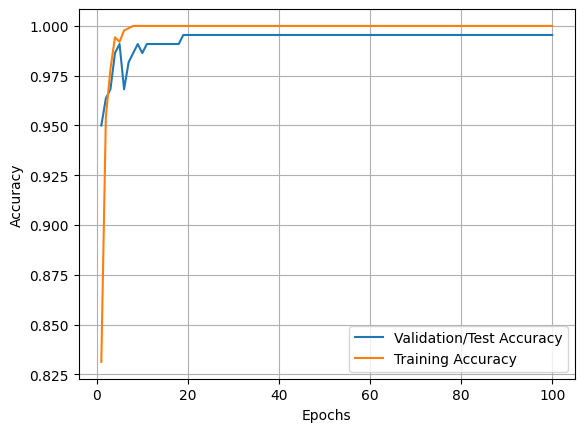

In [20]:
history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label = 'Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label = 'Training Accuracy')

plt.setp(line1)
plt.setp(line2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gapcolor: color or None
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Path` or `~.markers.MarkerStyle`

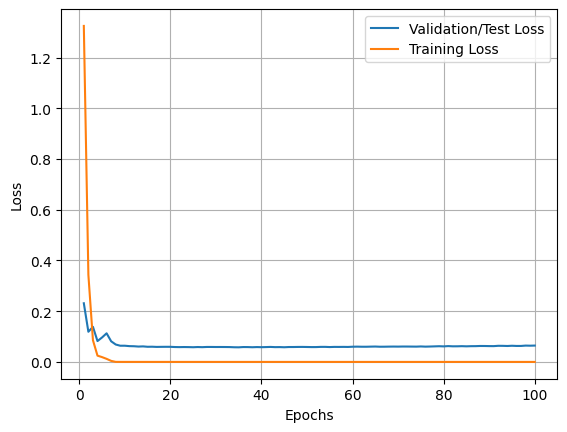

In [21]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label = 'Training Loss')

plt.setp(line1)
plt.setp(line2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [22]:
#One vs One
roc_auc_score(y_valid, y_pred,multi_class='ovo')

0.9974871354889112

In [23]:
#One vs Rest
roc_auc_score(y_valid, y_pred,multi_class='ovr')

0.9974871354889112

# Regularization tweaking

In [ ]:
# from tensorflow.keras import regularizers


# def build_model(hp):
#     base_model = MobileNetV2(
#     weights='imagenet',
#     include_top=False,
#     input_shape=(224,224,3)
# )

#     base_model.trainable = False

#     model = Sequential()
#     model.add(base_model)
#     model.add(layers.Flatten())

#     # Tune the number of units in the Dense layer
#     for i in range(hp.Int('num_layers', 1, 3)):
#         model.add(layers.Dense(
#             units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
#             activation='relu',kernel_regularizer=regularizers.l2(0.01)
#         ))
# #         model.add(layers.Dropout(rate=hp.Float('dropout_' + str(i), min_value=0.2, max_value=0.5, step=0.1)))

#     model.add(layers.Dense(num_classes, activation='softmax'))

#     # Tune the learning rate for the optimizer
#     lr = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')

#     model.compile(
#         optimizer=Adam(learning_rate=lr),
#         loss='categorical_crossentropy',
#         metrics=['accuracy']
#     )

#     return model
# # mobilenet_v2_model_3.add(layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
# # mobilenet_v2_model_3.add(layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.01)))

In [9]:
from tensorflow.keras import regularizers
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Multiply, BatchNormalization, Dropout, GlobalAveragePooling2D
def build_model1(hp):
    base_model = DenseNet121(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

    base_model.trainable = False


    
    
    NUM_CLASSES = 3
    inputs = layers.Input(shape=(224, 224, 3))
    x = base_model(inputs)
    x= layers.Flatten()(x)
# intermediate_features = mobilenet_v2_model_2.layers[-1].output
    attention_weights = layers.Dense(1, activation='softmax')(x)
    attention_weights = layers.Reshape((1, 1, -1))(attention_weights)
    attention_output = layers.Multiply()([x, attention_weights])
#     x = layers.Dense(64, activation='relu')(x)
#     x = layers.Dense(128, activation='relu')(x)




    # Tune the number of units in the Dense layer
    for i in range(hp.Int('num_layers', 1, 3)):
        x=layers.Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
            activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
#         model1.add(layers.Dropout(rate=hp.Float('dropout_' + str(i), min_value=0.2, max_value=0.5, step=0.1)))

    # Output layer
    outputs = Dense(NUM_CLASSES, activation='softmax')(x)

    # Tune the learning rate for the optimizer
    lr = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')
    
    model1=models.Model(inputs,outputs)

    model1.compile(
        optimizer=Adam(learning_rate=lr),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model1


In [10]:
tuner1 = kt.Hyperband(
    build_model1,
    objective='val_accuracy',
    max_epochs=20,
    factor=3,
    directory='my_dir',
    project_name='hyperparameter_tuning'
)

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
tuner1.search(train_generator, validation_data=validation_generator, epochs=20)




Trial 30 Complete [00h 02m 16s]
val_accuracy: 0.9954545497894287

Best val_accuracy So Far: 0.9954545497894287
Total elapsed time: 00h 45m 30s


In [12]:
best_hps = tuner1.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The optimal number of units in the 1st dense layer is {best_hps.get('units_0')}

The optimal number of units in the 2nd dense layer is {best_hps.get('units_1')}

The optimal number of units in the 3rd dense layer is {best_hps.get('units_2')}


The optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")
# {best_hps.get('dropout_1')}


The optimal number of units in the 1st dense layer is 96

The optimal number of units in the 2nd dense layer is 32

The optimal number of units in the 3rd dense layer is 32


The optimal learning rate for the optimizer is 0.00033760108458835025.



In [13]:

# Build the model with the optimal hyperparameters
model1 = tuner1.hypermodel.build(best_hps)
model1.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ densenet121 (Functional)        │ (None, 7, 7, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 96)             │     4,816,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,858,755 (45.24 MB)

 Trainable params: 4,821,251 (18.39 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [21]:
# Train the model
history=model1.fit(train_generator, validation_data=validation_generator, epochs=100)

# Evaluate the model on the test data
test_loss, test_accuracy = model1.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')




Epoch 1/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 1.0000 - loss: 0.2586 - val_accuracy: 0.9818 - val_loss: 0.3021
Epoch 2/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 1.0000 - loss: 0.2394 - val_accuracy: 0.9864 - val_loss: 0.2753
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9948 - loss: 0.2433 - val_accuracy: 0.9636 - val_loss: 0.3750
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9962 - loss: 0.2693 - val_accuracy: 0.9682 - val_loss: 0.3140
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9988 - loss: 0.2379 - val_accuracy: 0.9727 - val_loss: 0.2665
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9896 - loss: 0.2392 - val_accuracy: 0.8818 - val_loss: 0.6252
Epoch 7/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9643 - loss: 0.3325 - val_accuracy: 0.9727 - val_loss: 0.3296
Epoch 8/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9900 - loss: 0.2568 - 

In [15]:
import numpy as np
from sklearn.metrics import classification_report
# Assuming y_valid is one-hot encoded

vgg_model=model1
y_valid_labels = np.argmax(y_valid, axis=1)
# Predict the classes
y_pred = vgg_model.predict(X_valid, verbose=1)
y_pred_labels = np.argmax(y_pred, axis=1)

# Print the classification report
print(classification_report(y_valid_labels, y_pred_labels))



7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step
              precision    recall  f1-score   support

           0       0.99      0.89      0.94        92
           1       1.00      1.00      1.00       110
           2       0.63      0.94      0.76        18

    accuracy                           0.95       220
   macro avg       0.87      0.95      0.90       220
weighted avg       0.96      0.95      0.95       220



<function matplotlib.pyplot.show(close=None, block=None)>

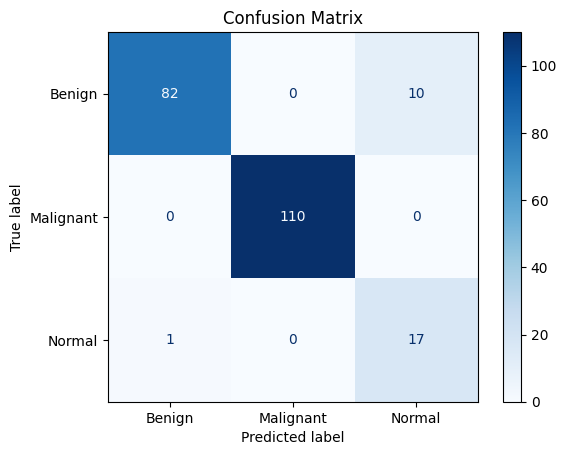

In [16]:
cm= confusion_matrix(y_true=y_valid_labels, y_pred=y_pred_labels)
target_names = ["Benign", "Malignant", "Normal"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show



  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gapcolor: color or None
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Path` or `~.markers.MarkerStyle`

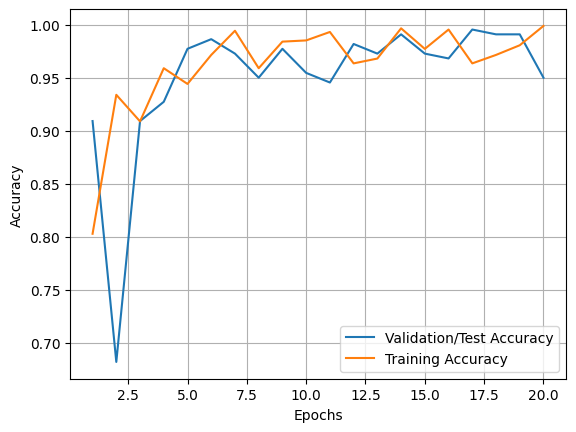

In [17]:

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label = 'Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label = 'Training Accuracy')

plt.setp(line1)
plt.setp(line2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gapcolor: color or None
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Path` or `~.markers.MarkerStyle`

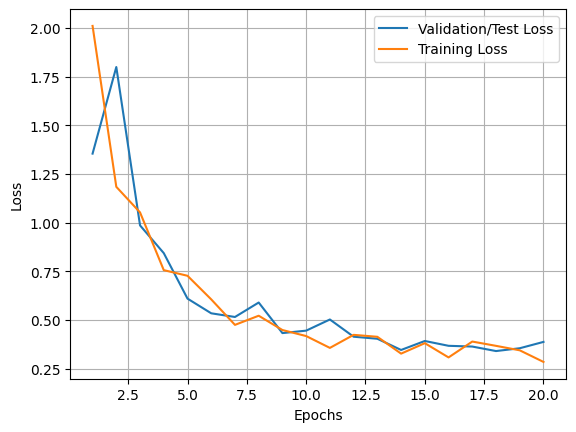

In [18]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label = 'Training Loss')

plt.setp(line1)
plt.setp(line2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()


In [19]:
#One vs One
roc_auc_score(y_valid, y_pred,multi_class='ovo')




0.9965205221835589

In [20]:
#One vs Rest
roc_auc_score(y_valid, y_pred,multi_class='ovr')

0.9965205221835589

## method 2

In [ ]:
! pip install hyperopt

In [ ]:
import hyperopt
from hyperopt import hp, fmin, tpe, Trials, space_eval, STATUS_OK

In [ ]:
def objective_fun(params):
  #defining the initial version of the neural network
  model = Sequential()
  model.add(layers.Flatten())
  model.add(layers.Dense(params['hiddenLayerOne'], activation=params['activation'], input_dim=124))
  model.add(layers.Dropout(params['dropout']))
  model.add(layers.Dense(params['hiddenLayerTwo'], activation=params['activation']))
  model.add(layers.Dropout(params['dropout']))
  model.add(layers.Dense(3, activation='softmax'))

  model.compile(optimizer=params['optimizer'](params['learning_rate']),
                loss='categorical_crossentropy', metrics='accuracy')

  input_shape = X_train.shape
  model.build(input_shape)
  es = EarlyStopping(monitor='val_loss',mode='min',
                       verbose=1,patience=15)

  model.fit(X_train, y_train, validation_data=(X_val, y_val))

  score, acc = model.evaluate(X_val, y_val, verbose=0)
  print('Test accuracy:', acc)
  return {'loss': -acc,
          'status': STATUS_OK,
          'model': model,
          'params': params}

In [ ]:
param_space = {
      "activation": hp.choice("activation",['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential', 'softmax']),
      "optimizer": hp.choice("optimizer",[SGD, Adam, RMSprop, Adagrad, Adamax, Nadam, Ftrl]),
      "learning_rate": hp.uniform("learning_rate",0.001,1),
      "epochs": hp.uniform("epochs",10,100),
      "hiddenLayerOne": hp.uniform("hiddenLayerOne",10,100),
      "hiddenLayerTwo": hp.uniform("hiddenLayerTwo",10,100),
      "dropout": hp.choice("dropout", [0.1, 0.4, 0.6])
  }

A few things to note from the 2 code snippets above:

Our neural network has 2 hidden layers and the hyperparameters that Hyperopt will help us to optimize are: activation function, optimizer, learning_rate, number of epochs, number of neurons on each hidden layer and dropout rate.
Possible activation, optimizer and dropout values are each in an array so Hyperopt will use the values in the array for optimization.
The number of neurons for each hidden layers is between 10 and 100.
The number of epochs is also between 10 and 100.
The learning rate is a number between 0.01 and 1 so Hyperopt will try with values in that range.
We are optimizing for accuracy and what is returned by the objective function is accuracy.
We will pass the parameters to the objective function later but notice how the neural network in the objective function expects parameters, i.e.,

In [ ]:
model.add(layers.Dropout(params['dropout']))

In [ ]:
trials = Trials()

In [ ]:
best_params = fmin(
  fn=objective_fun,
  space=param_space,
  algo=tpe.suggest,
  max_evals=200,
  trials=trials)

## method 3

In [ ]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [ ]:
# Make scorer accuracy
score_acc = make_scorer(accuracy_score)

# This code loads training and test datasets. It then splits the dataset into another training dataset and validation dataset. The validation dataset is 20% of the total dataset. The dataset is split according to the target variable.

In [ ]:
# Load dataset
trainSet = pd.read_csv('../input/tabular-playground-series-apr-2021/train.csv')
# Feature generation: training data
train = trainSet.drop(columns=['Name', 'Ticket', 'Cabin'])
train = train.dropna(axis=0)
train = pd.get_dummies(train)
# train validation split
X_train, X_val, y_train, y_val = train_test_split(train.drop(columns=['PassengerId','Survived'], axis=0),
                                                  train['Survived'],
                                                  test_size=0.2, random_state=111,
                                                  stratify=train['Survived'])

In [ ]:
# Create function
def nn_cl_bo(neurons, activation, optimizer, learning_rate,  batch_size, epochs ):
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
                 'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
                 'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
                 'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential', LeakyReLU,'relu']
    neurons = round(neurons)
    activation = activationL[round(activation)]
    batch_size = round(batch_size)
    epochs = round(epochs)
    def nn_cl_fun():
        opt = Adam(lr = learning_rate)
        nn = Sequential()
        nn.add(Dense(neurons, input_dim=10, activation=activation))
        nn.add(Dense(neurons, activation=activation))
        nn.add(Dense(1, activation='sigmoid'))
        nn.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
        return nn
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
    nn = KerasClassifier(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size,
                         verbose=0)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(nn, X_train, y_train, scoring=score_acc, cv=kfold, fit_params={'callbacks':[es]}).mean()
    return score

In [ ]:
# Set paramaters
params_nn ={
    'neurons': (10, 100),
    'activation':(0, 9),
    'optimizer':(0,7),
    'learning_rate':(0.01, 1),
    'batch_size':(200, 1000),
    'epochs':(20, 100)
}
# Run Bayesian Optimization
nn_bo = BayesianOptimization(nn_cl_bo, params_nn, random_state=111)
nn_bo.maximize(init_points=25, n_iter=4)

In [ ]:
params_nn_ = nn_bo.max['params']
activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
               'elu', 'exponential', LeakyReLU,'relu']
params_nn_['activation'] = activationL[round(params_nn_['activation'])]
params_nn_

In [ ]:
# Output:

# {'activation': 'selu',
#  'batch_size': 851.0135336291902,
#  'epochs': 53.7054301919375,
#  'learning_rate': 0.037173480215022196,
#  'neurons': 50.872297884262295,
#  'optimizer': 0.7372825972056519}

In [ ]:
# The following code creates a function for tuning the Neural Network hyperparameters and layers.

# Create function
def nn_cl_bo2(neurons, activation, optimizer, learning_rate, batch_size, epochs,
              layers1, layers2, normalization, dropout, dropout_rate):
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
                 'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
                 'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
                 'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential', LeakyReLU,'relu']
    neurons = round(neurons)
    activation = activationL[round(activation)]
    optimizer = optimizerD[optimizerL[round(optimizer)]]
    batch_size = round(batch_size)
    epochs = round(epochs)
    layers1 = round(layers1)
    layers2 = round(layers2)
    def nn_cl_fun():
        nn = Sequential()
        nn.add(Dense(neurons, input_dim=10, activation=activation))
        if normalization > 0.5:
            nn.add(BatchNormalization())
        for i in range(layers1):
            nn.add(Dense(neurons, activation=activation))
        if dropout > 0.5:
            nn.add(Dropout(dropout_rate, seed=123))
        for i in range(layers2):
            nn.add(Dense(neurons, activation=activation))
        nn.add(Dense(1, activation='sigmoid'))
        nn.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        return nn
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
    nn = KerasClassifier(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size, verbose=0)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(nn, X_train, y_train, scoring=score_acc, cv=kfold, fit_params={'callbacks':[es]}).mean()
    return score


In [ ]:
params_nn_ = nn_bo.max['params']
learning_rate = params_nn_['learning_rate']
activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
               'elu', 'exponential', LeakyReLU,'relu']
params_nn_['activation'] = activationL[round(params_nn_['activation'])]
params_nn_['batch_size'] = round(params_nn_['batch_size'])
params_nn_['epochs'] = round(params_nn_['epochs'])
params_nn_['layers1'] = round(params_nn_['layers1'])
params_nn_['layers2'] = round(params_nn_['layers2'])
params_nn_['neurons'] = round(params_nn_['neurons'])
optimizerL = ['Adam', 'SGD', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','Adam']
optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
             'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
             'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
             'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
params_nn_['optimizer'] = optimizerD[optimizerL[round(params_nn_['optimizer'])]]
params_nn_

In [ ]:
# Fitting Neural Network
def nn_cl_fun():
nn = Sequential()
nn.add(Dense(params_nn_['neurons'], input_dim=10, activation=params_nn_['activation']))
    if params_nn_['normalization'] > 0.5:
nn.add(BatchNormalization())
    for i in range(params_nn_['layers1']):
nn.add(Dense(params_nn_['neurons'], activation=params_nn_['activation']))
    if params_nn_['dropout'] > 0.5:
nn.add(Dropout(params_nn_['dropout_rate'], seed=123))
    for i in range(params_nn_['layers2']):
nn.add(Dense(params_nn_['neurons'], activation=params_nn_['activation']))
nn.add(Dense(1, activation='sigmoid'))
nn.compile(loss='binary_crossentropy', optimizer=params_nn_['optimizer'], metrics=['accuracy'])
    return nn
es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
nn = KerasClassifier(build_fn=nn_cl_fun, epochs=params_nn_['epochs'], batch_size=params_nn_['batch_size'],
                         verbose=0)
 nn.fit(X_train, y_train, validation_data=(X_val, y_val), verbose=1)

In [ ]:
# https://www.analyticsvidhya.com/blog/2021/05/tuning-the-hyperparameters-and-layers-of-neural-network-deep-learning/

# try

In [ ]:
X_train, X_mix, y_train, y_mix = train_test_split(X, y, test_size=0.2, random_state=10)
X_test, X_valid, y_test, y_valid = train_test_split(X_mix, y_mix, test_size=0.2, random_state=10)



print('Train length:', len(X_train), X_train.shape)
print('Valid length:', len(X_valid), X_valid.shape)
print("Test length", len(X_test), X_test.shape)
train_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()
# X,y valid are used for evaluate matrix






# X_train, X_valid, y_train, y_valid=X_train, X_test, y_train, y_test


# print('Train length:', len(X_train), X_train.shape)
# print('Valid length:', len(X_valid), X_valid.shape)

# train_generator = train_datagen.flow(X_fold, y_fold, batch_size=8, shuffle=True)
# validation_generator = val_datagen.flow(X_valid, y_valid, batch_size=8, shuffle=True)

# **DenseNet121 on 100**


In [10]:
# base_model = MobileNetV2(
#     weights='imagenet',
#     include_top=False,
#     input_shape=(224,224,3)
# )





import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, BatchNormalization, Activation, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.densenet import DenseNet121

# Load the pre-trained DenseNet121 model (without top layers)
base_model = DenseNet121(include_top=False, weights='imagenet', input_shape=(224, 224, 3))


# We define the number of classes in the classification problem.
NUM_CLASSES = 3

# First, a sequential model is created, which will be used to build the VGG model.
vgg_model = Sequential()

# Se agrega una capa al modelo. base_model el modelo anteriormente preentrenado.
vgg_model.add(base_model)

# A flattening layer (Flatten) is added. This layer converts the output from the
# previous layer (which is likely a three-dimensional tensor) into a one-dimensional vector.
vgg_model.add(layers.Flatten())
dummy_input = tf.zeros((1, 224, 224, 3))
_ = vgg_model(dummy_input)

# dummy_input = tf.zeros((1, 224, 224, 3))
# _ = vgg_model(dummy_input)

# intermediate_features = vgg_model.layers[-1].output
# attention_weights = layers.Dense(1, activation='softmax')(intermediate_features)
# attention_weights = layers.Reshape((1, 1, -1))(attention_weights)
# attention_output = layers.Multiply()([intermediate_features, attention_weights])


# vgg_model.add(layers.Dropout(0.25))
# vgg_model.add(layers.Dense(256, activation='relu'))
# vgg_model.add(layers.Dense(128, activation='relu'))
# vgg_model.add(layers.Dense(64, activation='relu'))



vgg_model.add(layers.Dense(256, activation='relu'))
# vgg_model.add(layers.Dense(512, activation='relu'))

vgg_model.add(layers.Dense(32, activation='relu'))


vgg_model.add(layers.Dense(NUM_CLASSES, activation='softmax'))

# The first layer of the model (base_model) is frozen, so the weights of this layer
# will not be updated during training.
vgg_model.layers[0].trainable = False



vgg_model.summary()






# vgg_model.summary()

optimizer=keras.optimizers.Adam(learning_rate=0.00032)
losses=keras.losses.SparseCategoricalCrossentropy()
metrics=['accuracy']
vgg_model.compile(optimizer=optimizer,loss=losses,metrics=metrics)

epochs=20
batch_size=32
history= vgg_model.fit(X_train,y_train, epochs=100, batch_size=32, validation_data=(X_valid, y_valid))




29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ (1, 7, 7, 1024)        │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (1, 50176)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (1, 256)               │    12,845,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (1, 32)                │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (1, 3)                 │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,891,139 (75.88 MB)

 Trainable params: 12,853,635 (49.03 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

Epoch 1/100
 1/28 ━━━━━━━━━━━━━━━━━━━━ 15:23 34s/step - accuracy: 0.5938 - loss: 1.0197

I0000 00:00:1720678608.889122     114 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1720678608.959534     114 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


27/28 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.7033 - loss: 0.9439

W0000 00:00:1720678627.672383     114 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


KeyboardInterrupt: 

In [ ]:
test_loss, test_accuracy = vgg_model.evaluate(X_test,y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)
y_pred = vgg_model.predict(X_test, verbose=1)
y_pred_2 = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_2))

In [ ]:
cm= confusion_matrix(y_true=y_test, y_pred=y_pred_2)
target_names = ["Benign", "Malignant", "Normal"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show

In [ ]:
history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label = 'Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label = 'Training Accuracy')

plt.setp(line1)
plt.setp(line2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label = 'Training Loss')

plt.setp(line1)
plt.setp(line2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
#One vs One

roc_auc_score(y_test, y_pred,multi_class='ovo')

In [ ]:
#One vs Rest
roc_auc_score(y_test, y_pred,multi_class='ovr')

# +Attention

In [19]:


import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, BatchNormalization, Activation, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.densenet import DenseNet121

# Load the pre-trained DenseNet121 model (without top layers)
base_model = DenseNet121(include_top=False, weights='imagenet', input_shape=(224, 224, 3))



# We define the number of classes in the classification problem.
NUM_CLASSES = 3

# First, a sequential model is created, which will be used to build the VGG model.
vgg_model = Sequential()

# Se agrega una capa al modelo. base_model el modelo anteriormente preentrenado.
vgg_model.add(base_model)

# A flattening layer (Flatten) is added. This layer converts the output from the
# previous layer (which is likely a three-dimensional tensor) into a one-dimensional vector.
vgg_model.add(layers.Flatten())
dummy_input = tf.zeros((1, 224, 224, 3))
_ = vgg_model(dummy_input)

intermediate_features = vgg_model.layers[-1].output
attention_weights = layers.Dense(1, activation='softmax')(intermediate_features)
attention_weights = layers.Reshape((1, 1, -1))(attention_weights)
attention_output = layers.Multiply()([intermediate_features, attention_weights])


# vgg_model.add(layers.Dropout(0.25))
# vgg_model.add(layers.Dense(256, activation='relu'))
# vgg_model.add(layers.Dense(128, activation='relu'))
# vgg_model.add(layers.Dense(64, activation='relu'))



vgg_model.add(layers.Dense(256, activation='relu'))
# vgg_model.add(layers.Dense(512, activation='relu'))

vgg_model.add(layers.Dense(32, activation='relu'))


vgg_model.add(layers.Dense(NUM_CLASSES, activation='softmax'))

# The first layer of the model (base_model) is frozen, so the weights of this layer
# will not be updated during training.
vgg_model.layers[0].trainable = False



vgg_model.summary()






# vgg_model.summary()

optimizer=keras.optimizers.Adam(learning_rate=0.0001)
losses=keras.losses.SparseCategoricalCrossentropy()
metrics=['accuracy']
vgg_model.compile(optimizer=optimizer,loss=losses,metrics=metrics)

epochs=20
batch_size=32
history= vgg_model.fit(X_train,y_train, epochs=100, batch_size=32, validation_data=(X_valid, y_valid))



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ (1, 7, 7, 1024)        │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (1, 50176)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (1, 256)               │    12,845,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (1, 32)                │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (1, 3)                 │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,891,139 (75.88 MB)

 Trainable params: 12,853,635 (49.03 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

Epoch 1/100
 2/28 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.8047 - loss: 0.7282

W0000 00:00:1727307441.431688     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.7461 - loss: 0.9131

W0000 00:00:1727307450.008374     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1727307458.856370     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


28/28 ━━━━━━━━━━━━━━━━━━━━ 43s 836ms/step - accuracy: 0.7482 - loss: 0.9037 - val_accuracy: 0.9000 - val_loss: 0.2899
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.9496 - loss: 0.1448 - val_accuracy: 0.9227 - val_loss: 0.1968
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.9879 - loss: 0.0504 - val_accuracy: 0.9500 - val_loss: 0.1677
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.9912 - loss: 0.0410 - val_accuracy: 0.9636 - val_loss: 0.1373
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.9998 - loss: 0.0126 - val_accuracy: 0.9636 - val_loss: 0.1349
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.9992 - loss: 0.0070 - val_accuracy: 0.9500 - val_loss: 0.1539
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.9995 - loss: 0.0095 - val_accuracy: 0.9727 - val_loss: 0.1349
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.9980 - loss: 0.0104 - val_accuracy: 0.9682 - v

In [16]:
test_loss, test_accuracy = vgg_model.evaluate(X_test,y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)
y_pred = vgg_model.predict(X_test, verbose=1)
y_pred_2 = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_2))



7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.9592 - loss: 0.2674
Test Loss: 0.17131824791431427
Test Accuracy: 0.9681817889213562
3/7 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step

W0000 00:00:1727307023.362774     124 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step
              precision    recall  f1-score   support

           0       0.97      0.96      0.97        75
           1       0.97      0.99      0.98       117
           2       0.93      0.89      0.91        28

    accuracy                           0.97       220
   macro avg       0.96      0.95      0.95       220
weighted avg       0.97      0.97      0.97       220



<function matplotlib.pyplot.show(close=None, block=None)>

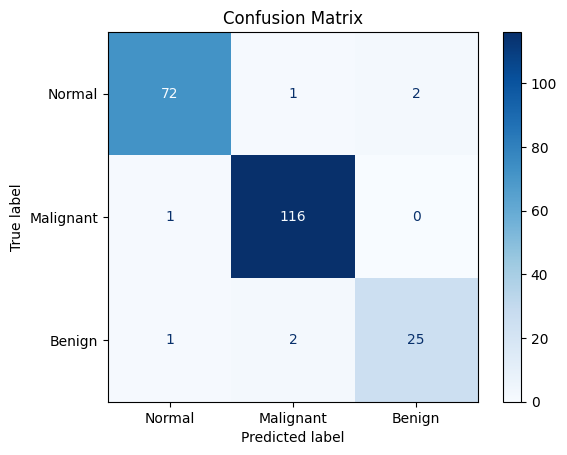

In [18]:
cm= confusion_matrix(y_true=y_test, y_pred=y_pred_2)
target_names = ["Normal", "Malignant","Benign"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show


  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gapcolor: color or None
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Path` or `~.markers.MarkerStyle`

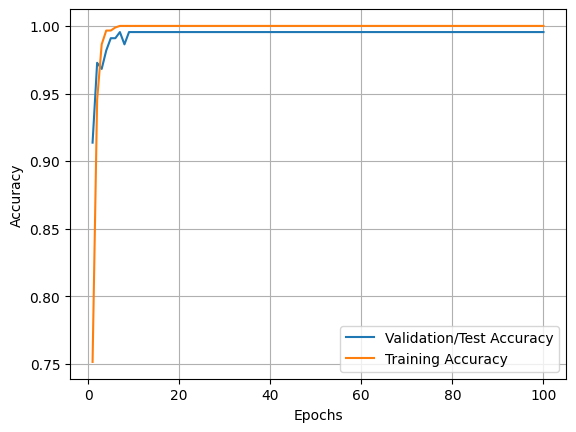

In [13]:
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
line1 = plt.plot(epochs, val_acc_values, label = 'Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label = 'Training Accuracy')
plt.setp(line1)
plt.setp(line2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()


  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gapcolor: color or None
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Path` or `~.markers.MarkerStyle`

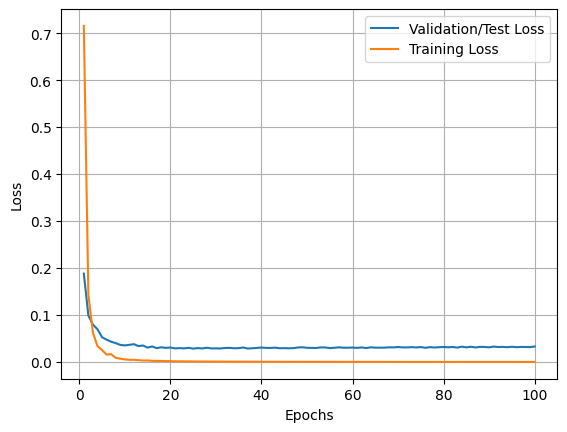

In [14]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label = 'Training Loss')
plt.setp(line1)
plt.setp(line2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [15]:


#One vs One
roc_auc_score(y_test, y_pred,multi_class='ovo')


0.9972149026496853

In [16]:
#One vs Rest
roc_auc_score(y_test, y_pred,multi_class='ovr')

0.9984469914382744

ValueError: multi_class must be in ('ovo', 'ovr')

In [ ]:
#One vs One

roc_auc_score(y_test, y_pred,multi_class='ovo')

In [ ]:
#One vs Rest
roc_auc_score(y_test, y_pred,multi_class='ovr')

In [ ]:
# from tensorflow.keras import regularizers
# from tensorflow.keras import layers, models
# from tensorflow.keras.applications import MobileNetV2
# from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Multiply, BatchNormalization, Dropout, GlobalAveragePooling2D
# def build_model1(hp):
#     base_model = MobileNetV2(
#     weights='imagenet',
#     include_top=False,
#     input_shape=(224,224,3)
# )

#     base_model.trainable = False


    
    
#     NUM_CLASSES = 3
#     inputs = layers.Input(shape=(224, 224, 3))
#     x = base_model(inputs)
#     x= layers.Flatten()(x)
# # intermediate_features = mobilenet_v2_model_2.layers[-1].output
#     attention_weights = layers.Dense(1, activation='softmax')(x)
#     attention_weights = layers.Reshape((1, 1, -1))(attention_weights)
#     attention_output = layers.Multiply()([x, attention_weights])
# #     x = layers.Dense(64, activation='relu')(x)
# #     x = layers.Dense(128, activation='relu')(x)




#     # Tune the number of units in the Dense layer
#     for i in range(hp.Int('num_layers', 1, 3)):
#         x=layers.Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
#             activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
# #         model1.add(layers.Dropout(rate=hp.Float('dropout_' + str(i), min_value=0.2, max_value=0.5, step=0.1)))

#     # Output layer
#     outputs = Dense(NUM_CLASSES, activation='softmax')(x)

#     # Tune the learning rate for the optimizer
#     lr = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')
    
#     model1=models.Model(inputs,outputs)

#     model1.compile(
#         optimizer=Adam(learning_rate=lr),
#         loss='categorical_crossentropy',
#         metrics=['accuracy']
#     )


# **MobileNEtV2 on 100**


In [ ]:
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

# We define the number of classes in the classification problem.
NUM_CLASSES = 3

# First, a sequential model is created, which will be used to build the VGG model.
vgg_model = Sequential()

# Se agrega una capa al modelo. base_model el modelo anteriormente preentrenado.
vgg_model.add(base_model)

# A flattening layer (Flatten) is added. This layer converts the output from the
# previous layer (which is likely a three-dimensional tensor) into a one-dimensional vector.
vgg_model.add(layers.Flatten())
# dummy_input = tf.zeros((1, 224, 224, 3))
# _ = vgg_model(dummy_input)


# intermediate_features = vgg_model.layers[-1].output
# attention_weights = layers.Dense(1, activation='softmax')(intermediate_features)
# attention_weights = layers.Reshape((1, 1, -1))(attention_weights)
# attention_output = layers.Multiply()([intermediate_features, attention_weights])


# vgg_model.add(layers.Dropout(0.25))
# vgg_model.add(layers.Dense(256, activation='relu'))
# vgg_model.add(layers.Dense(128, activation='relu'))
# vgg_model.add(layers.Dense(64, activation='relu'))



vgg_model.add(layers.Dense(256, activation='relu'))
# vgg_model.add(layers.Dense(512, activation='relu'))

vgg_model.add(layers.Dense(32, activation='relu'))


vgg_model.add(layers.Dense(NUM_CLASSES, activation='softmax'))

# The first layer of the model (base_model) is frozen, so the weights of this layer
# will not be updated during training.
vgg_model.layers[0].trainable = False



vgg_model.summary()





# vgg_model.summary()

optimizer=keras.optimizers.Adam(learning_rate=0.00036678993892040417)
losses=keras.losses.SparseCategoricalCrossentropy()
metrics=['accuracy']
vgg_model.compile(optimizer=optimizer,loss=losses,metrics=metrics)

epochs=20
batch_size=32
history= vgg_model.fit(X_train,y_train, epochs=100, batch_size=32, validation_data=(X_valid, y_valid))




In [ ]:
# from tensorflow.keras import layers, models
# from tensorflow.keras.applications import MobileNetV2
# from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Multiply, BatchNormalization, Dropout, GlobalAveragePooling2D

# base_model = MobileNetV2(
#     weights='imagenet',
#     include_top=False,
#     input_shape=(224,224,3)
# )

# # We define the number of classes in the classification problem.
# NUM_CLASSES = 3
# inputs = layers.Input(shape=(224, 224, 3))
# x = base_model(inputs)
# x= layers.Flatten()(x)
# # intermediate_features = mobilenet_v2_model_2.layers[-1].output
# attention_weights = layers.Dense(1, activation='softmax')(x)
# attention_weights = layers.Reshape((1, 1, -1))(attention_weights)
# attention_output = layers.Multiply()([x, attention_weights])
# x = layers.Dense(416, activation='relu')(x)
# #     x = layers.Dense(128, activation='relu')(x)

# outputs = Dense(NUM_CLASSES, activation='softmax')(x)
# # intermediate_features = vgg_model.layers[-1].output
# # attention_weights = layers.Dense(1, activation='softmax')(intermediate_features)
# # attention_weights = layers.Reshape((1, 1, -1))(attention_weights)
# # attention_output = layers.Multiply()([intermediate_features, attention_weights])


# # vgg_model.add(layers.Dropout(0.25))
# # vgg_model.add(layers.Dense(256, activation='relu'))
# # vgg_model.add(layers.Dense(128, activation='relu'))
# # vgg_model.add(layers.Dense(64, activation='relu'))



# # vgg_model.add(layers.Dense(416, activation='relu'))
# # vgg_model.add(layers.Dense(512, activation='relu'))

# # vgg_model.add(layers.Dense(320, activation='relu'))

# vgg_model=models.Model(inputs,outputs)
# # vgg_model.add(layers.Dense(NUM_CLASSES, activation='softmax'))

# # The first layer of the model (base_model) is frozen, so the weights of this layer
# # will not be updated during training.
# vgg_model.layers[0].trainable = False



# vgg_model.summary()





# # vgg_model.summary()

# optimizer=keras.optimizers.Adam(learning_rate=0.00021655121893310374)
# losses=keras.losses.SparseCategoricalCrossentropy()
# metrics=['accuracy']
# vgg_model.compile(optimizer=optimizer,loss=losses,metrics=metrics)

# epochs=20
# batch_size=32
# history= vgg_model.fit(X_train,y_train, epochs=100, batch_size=32, validation_data=(X_valid, y_valid))




In [ ]:
test_loss, test_accuracy = vgg_model.evaluate(X_test,y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)


In [ ]:
y_pred = vgg_model.predict(X_test, verbose=1)
y_pred_2 = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_2))

In [ ]:
cm= confusion_matrix(y_true=y_test, y_pred=y_pred_2)
target_names = ["Benign", "Malignant", "Normal"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show

In [ ]:
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
line1 = plt.plot(epochs, val_acc_values, label = 'Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label = 'Training Accuracy')
plt.setp(line1)
plt.setp(line2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label = 'Training Loss')
plt.setp(line1)
plt.setp(line2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
#One vs One
roc_auc_score(y_test, y_pred,multi_class='ovo')

In [ ]:
#One vs Rest
roc_auc_score(y_test, y_pred,multi_class='ovr')

# **+Attention**

In [19]:
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)





import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, BatchNormalization, Activation, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.densenet import DenseNet121

# Load the pre-trained DenseNet121 model (without top layers)
# base_model = DenseNet121(include_top=False, weights='imagenet', input_shape=(224, 224, 3))



# We define the number of classes in the classification problem.
NUM_CLASSES = 3

# First, a sequential model is created, which will be used to build the VGG model.
vgg_model = Sequential()

# Se agrega una capa al modelo. base_model el modelo anteriormente preentrenado.
vgg_model.add(base_model)

# A flattening layer (Flatten) is added. This layer converts the output from the
# previous layer (which is likely a three-dimensional tensor) into a one-dimensional vector.
vgg_model.add(layers.Flatten())
dummy_input = tf.zeros((1, 224, 224, 3))
_ = vgg_model(dummy_input)

intermediate_features = vgg_model.layers[-1].output
attention_weights = layers.Dense(1, activation='softmax')(intermediate_features)
attention_weights = layers.Reshape((1, 1, -1))(attention_weights)
attention_output = layers.Multiply()([intermediate_features, attention_weights])


# vgg_model.add(layers.Dropout(0.25))
# vgg_model.add(layers.Dense(256, activation='relu'))
# vgg_model.add(layers.Dense(128, activation='relu'))
# vgg_model.add(layers.Dense(64, activation='relu'))



vgg_model.add(layers.Dense(160, activation='relu'))
# vgg_model.add(layers.Dense(512, activation='relu'))

vgg_model.add(layers.Dense(480, activation='relu'))

vgg_model.add(layers.Dense(224, activation='relu'))
vgg_model.add(layers.Dense(NUM_CLASSES, activation='softmax'))

# The first layer of the model (base_model) is frozen, so the weights of this layer
# will not be updated during training.
vgg_model.layers[0].trainable = False



vgg_model.summary()






# vgg_model.summary()

optimizer=keras.optimizers.Adam(learning_rate=0.0013383290456424192)
losses=keras.losses.SparseCategoricalCrossentropy()
metrics=['accuracy']
vgg_model.compile(optimizer=optimizer,loss=losses,metrics=metrics)

epochs=20
batch_size=32
history= vgg_model.fit(X_train,y_train, epochs=100, batch_size=32, validation_data=(X_valid, y_valid))



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (1, 7, 7, 1280)        │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (1, 62720)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (1, 160)               │    10,035,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (1, 480)               │        77,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (1, 224)               │       107,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (1, 3)                 │           675 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,479,043 (47.60 MB)

 Trainable params: 10,221,059 (38.99 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/100
 5/28 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5007 - loss: 9.5110

W0000 00:00:1727555896.715482     114 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 0.6561 - loss: 6.7714

W0000 00:00:1727555907.607359     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


28/28 ━━━━━━━━━━━━━━━━━━━━ 30s 646ms/step - accuracy: 0.6597 - loss: 6.6713 - val_accuracy: 0.8409 - val_loss: 2.0257
Epoch 2/100
 3/28 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9045 - loss: 1.1235

W0000 00:00:1727555914.156430     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9107 - loss: 0.5697 - val_accuracy: 0.8545 - val_loss: 0.4969
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9373 - loss: 0.1719 - val_accuracy: 0.9045 - val_loss: 0.4021
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9894 - loss: 0.0388 - val_accuracy: 0.9364 - val_loss: 0.2830
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9962 - loss: 0.0083 - val_accuracy: 0.9182 - val_loss: 0.4983
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9795 - loss: 0.0659 - val_accuracy: 0.9136 - val_loss: 0.4612
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9900 - loss: 0.0269 - val_accuracy: 0.9455 - val_loss: 0.3278
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9899 - loss: 0.0326 - val_accuracy: 0.9545 - val_loss: 0.2481
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.9636 - val_l

In [20]:

test_loss, test_accuracy = vgg_model.evaluate(X_test,y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)
y_pred = vgg_model.predict(X_test, verbose=1)
y_pred_2 = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_2))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9530 - loss: 0.4794
Test Loss: 0.3594251573085785
Test Accuracy: 0.9636363387107849
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

W0000 00:00:1727556034.028876     114 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 602ms/step
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        75
           1       0.99      1.00      1.00       117
           2       0.83      0.89      0.86        28

    accuracy                           0.96       220
   macro avg       0.93      0.94      0.94       220
weighted avg       0.96      0.96      0.96       220



W0000 00:00:1727556037.638241     114 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


<function matplotlib.pyplot.show(close=None, block=None)>

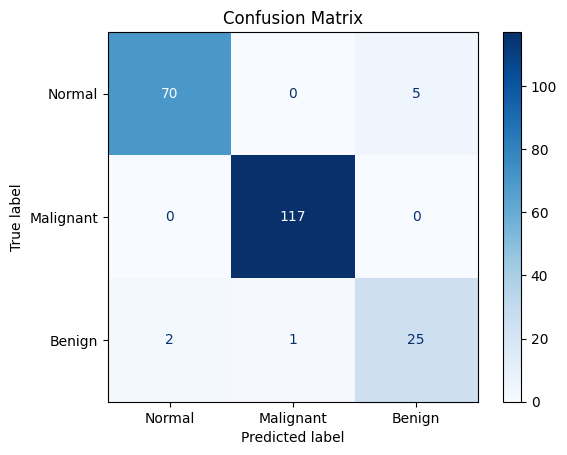

In [21]:
cm= confusion_matrix(y_true=y_test, y_pred=y_pred_2)
target_names = ["Normal", "Malignant","Benign"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gapcolor: color or None
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Path` or `~.markers.MarkerStyle`

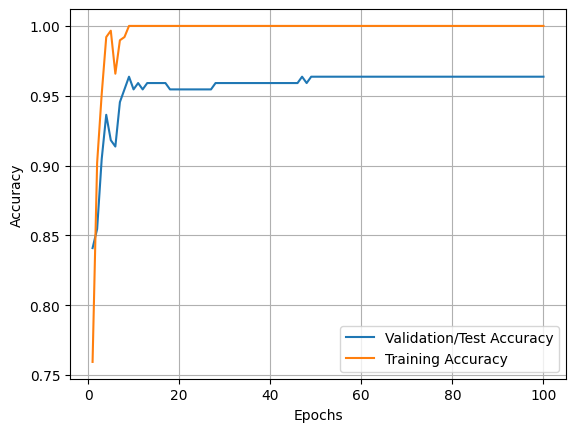

In [22]:
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
line1 = plt.plot(epochs, val_acc_values, label = 'Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label = 'Training Accuracy')
plt.setp(line1)
plt.setp(line2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gapcolor: color or None
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Path` or `~.markers.MarkerStyle`

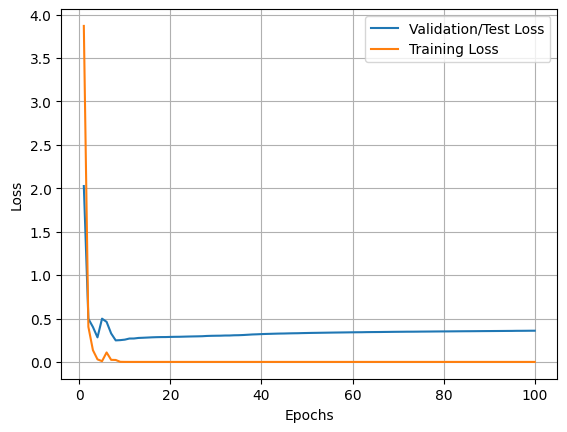

In [23]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label = 'Training Loss')
plt.setp(line1)
plt.setp(line2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [24]:
#One vs One
roc_auc_score(y_test, y_pred,multi_class='ovo')

0.986937321937322

In [25]:
#One vs Rest
roc_auc_score(y_test, y_pred,multi_class='ovr')

0.9913625476500121